# Gaussean blur
Blurring an image by convolution with a gaussean blur kernel

width x height: 638 x 425


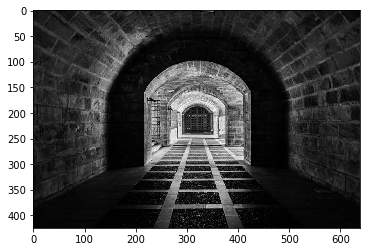

In [2]:
%matplotlib inline

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

pil_image = Image.open('image3.jpg')
image = np.array(pil_image, dtype=np.float32)#[:,:,0]
image /= 255 # normalize the image
height, width = image.shape
print("width x height: %d x %d" % (width, height))
plt.imshow(image, cmap='gray')

### Generating the kernel

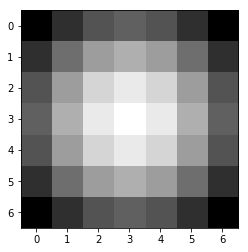

In [24]:
kernel_size = 7
sigma = 1.0

def generate_gaussian(kernel_size, sigma):
    x, y = np.meshgrid(np.linspace(-1, 1, kernel_size), np.linspace(-1, 1, kernel_size))
    d = np.sqrt(x*x + y*y)
    g = np.exp(-((d**2) / (2.0 * sigma**2)))
    return g / np.sum(g)

G = generate_gaussian(kernel_size, sigma)
plt.imshow(G, cmap='gray')

### Padding the original image
Pad using repeat edge

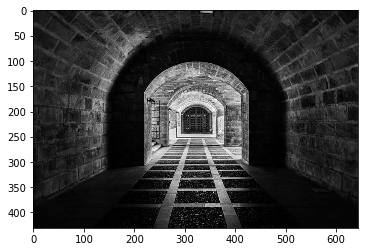

In [27]:
padding = int(kernel_size / 2)
padded_image = np.pad(image, (padding,), 'edge')
plt.imshow(padded_image, cmap='gray')

### Performing convolution

('Result shape:', (425, 638))


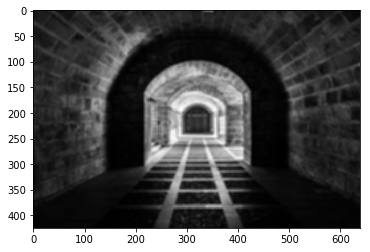

In [34]:
def conv2d(a, f):
    shape = f.shape + tuple(np.subtract(a.shape, f.shape) + 1)
    strd = np.lib.stride_tricks.as_strided
    subM = strd(a, shape=shape, strides=a.strides * 2)
    return np.einsum('ij,ijkl->kl', f, subM)

result_image = conv2d(padded_image, G)

print("Result shape:", result_image.shape)
plt.imshow(result_image, cmap='gray')

### Different values of sigma

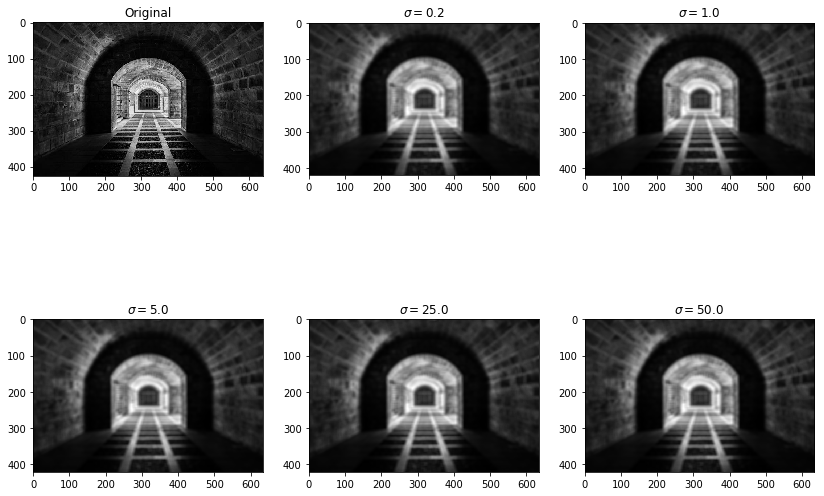

In [39]:
kernel_size = 11
sigmas = [0.2, 1, 5, 25, 50]

plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt_idx = 2
for s in sigmas:
    g = generate_gaussian(kernel_size, sigma)
    img = conv2d(padded_image, g)
    plt.subplot(2, 3, plt_idx)
    plt.title("$\sigma = %.1f$" % s)
    plt.imshow(img, cmap='gray')
    plt_idx += 1